In [1]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

## Ödev 3.1 
* orjinal, karanlık, aydınlık, ve dar kontrastlı (aynı resmin farklı versiyonlarının) resimlere histogram eşitleme işleme işlemi uygulayın 
* önceki ve sonraki resimleri histogramları ile gösterin, tartışın (aşağıda verilen örnek resimler gibi)


https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23

In [2]:
from utils import img_read, show_hist

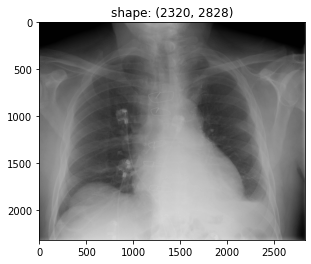

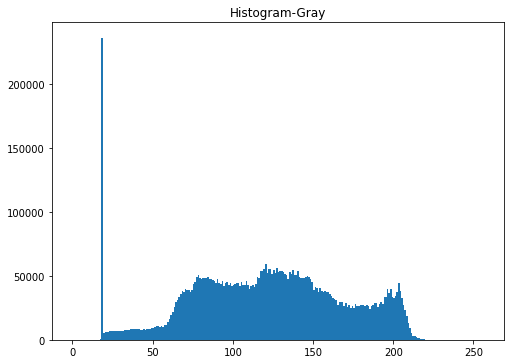

In [3]:
img_org = img_read('lung.jpg',ret_gray=True)
show_hist(img_org)

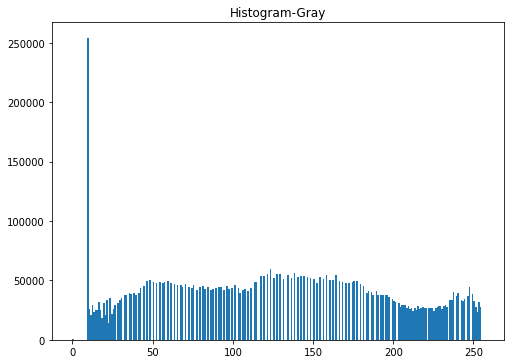

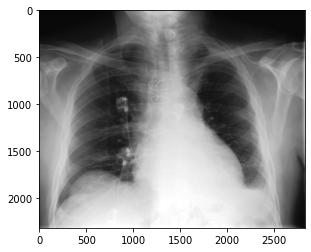

In [4]:
# Global Histogram Equalization
#https://levelup.gitconnected.com/introduction-to-histogram-equalization-for-digital-image-enhancement-420696db9e43
def hist_equalization(img_array):
    
    # STEP 1: Normalized cumulative histogram
    
    #flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    #normalize
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    #cumulative histogram
    chistogram_array = np.cumsum(histogram_array)

    # STEP 2: Pixel mapping lookup table    
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


    # STEP 3: Transformation
    eq_img_array = np.take(transform_map, img_array)
    return eq_img_array.astype(np.uint8)

hist_eq = hist_equalization(img_org)

show_hist(hist_eq)
plt.imshow(hist_eq, cmap='gray')


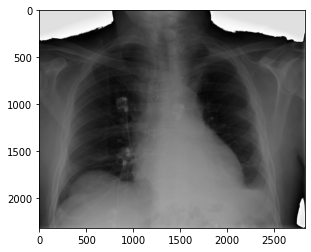

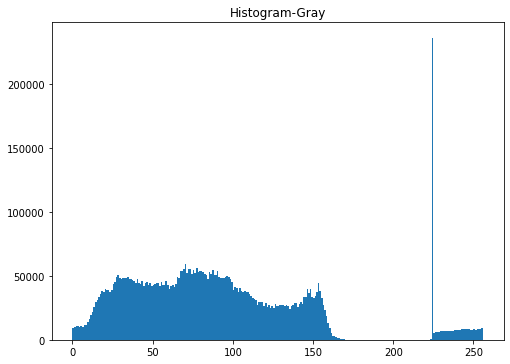

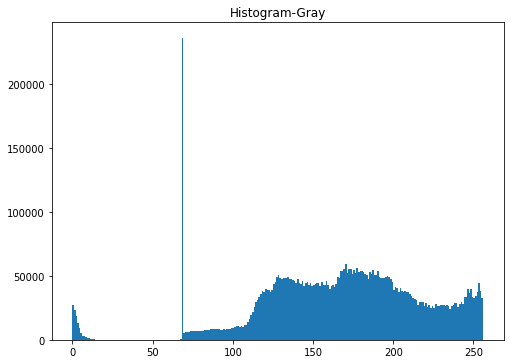

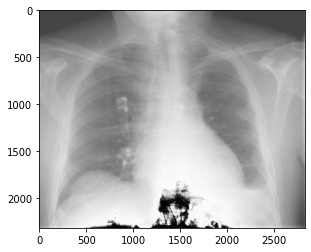

In [5]:
dark_img = img_org - 50
bright_img = img_org + 50

plt.imshow(dark_img, cmap='gray')
show_hist(dark_img)
plt.show()
show_hist(bright_img)
plt.imshow(bright_img, cmap='gray')

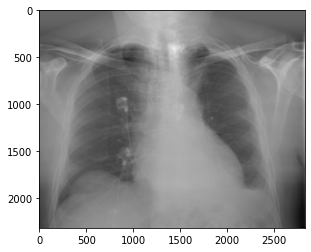

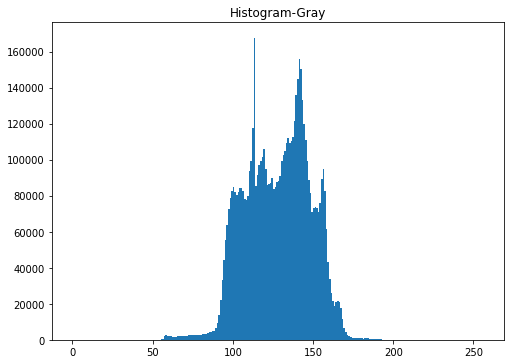

In [6]:
def mean_std_img(img, mean_value, std_value):
    norm_tmp = img - img.mean(axis=-1)[...,None]
    std_mul = std_value / img.std(axis=-1)[...,None]
    scaled_img = mean_value + norm_tmp * std_mul
    return scaled_img

low_contrast_img= mean_std_img(img_org, 128, 20)

plt.imshow(low_contrast_img, cmap='gray')
show_hist(low_contrast_img)
plt.show()

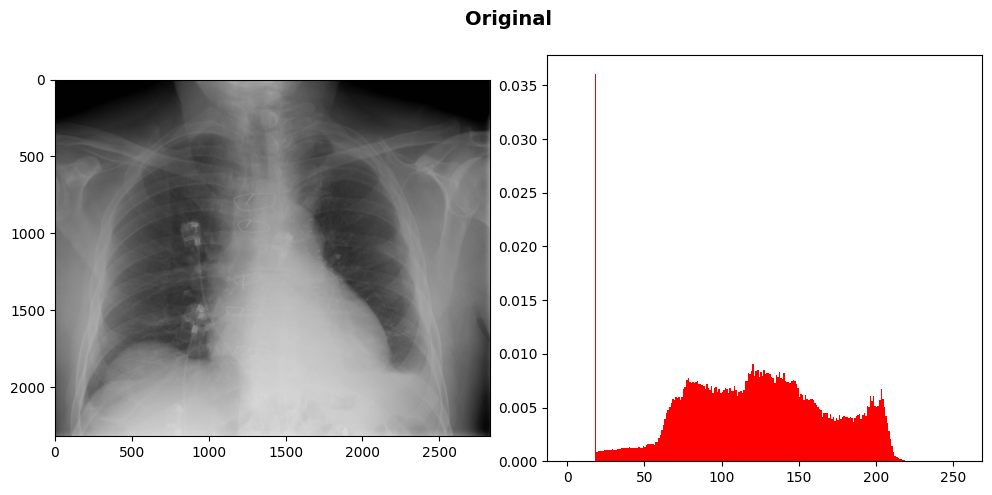

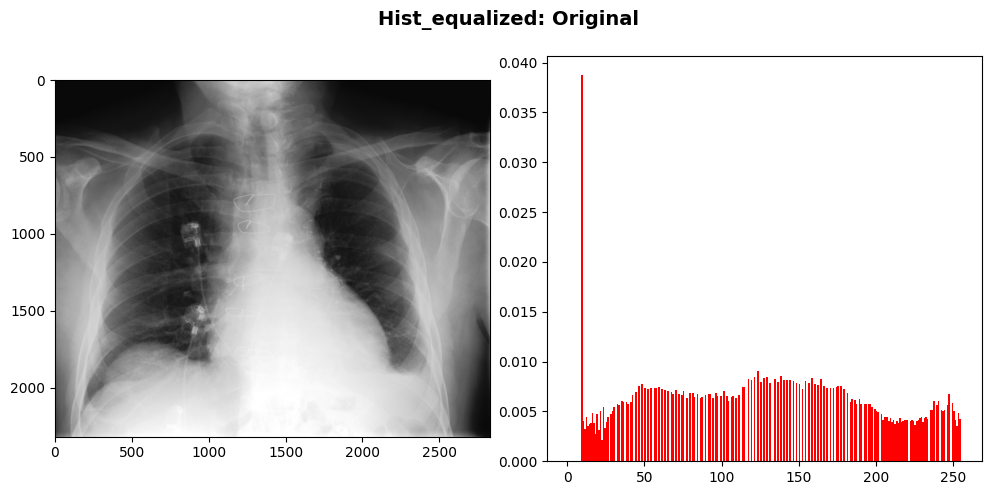

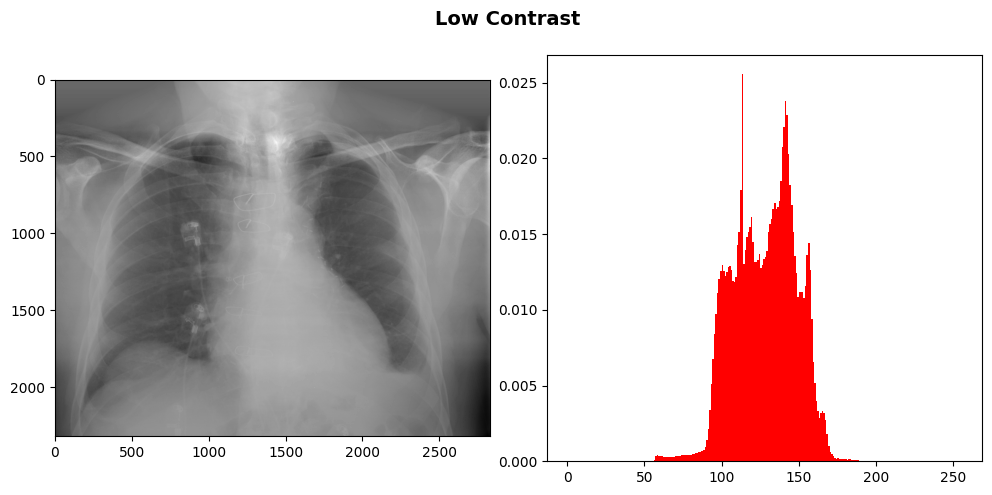

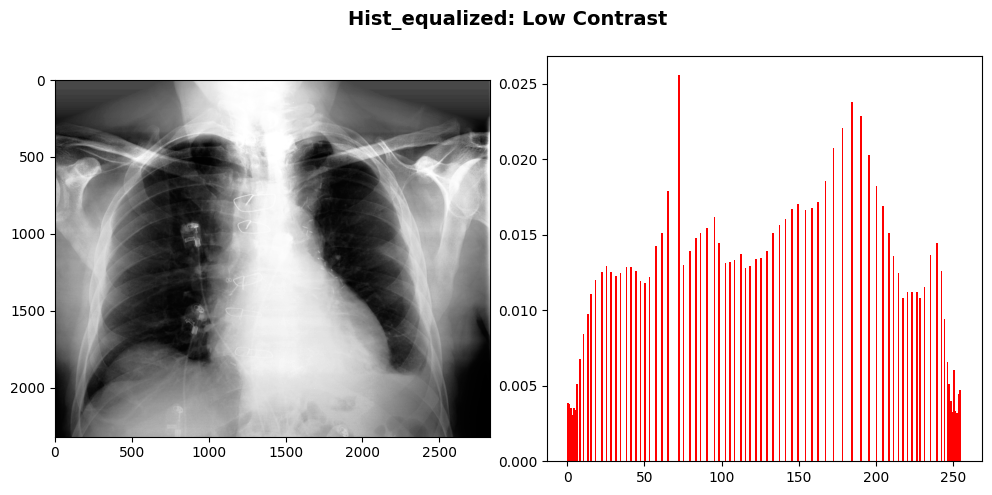

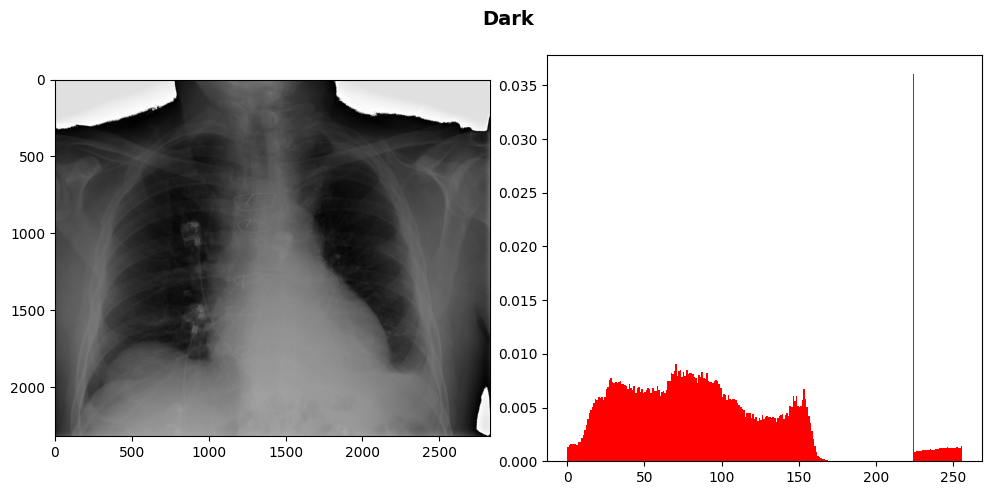

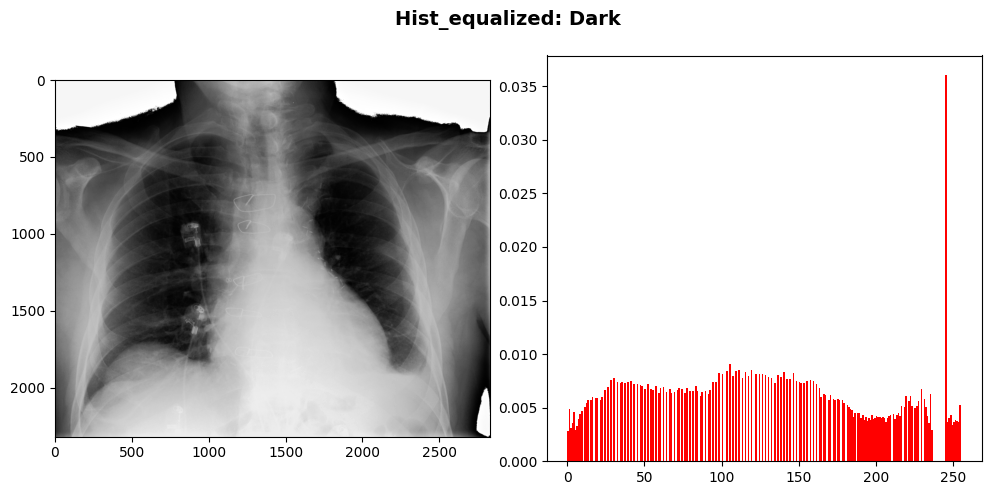

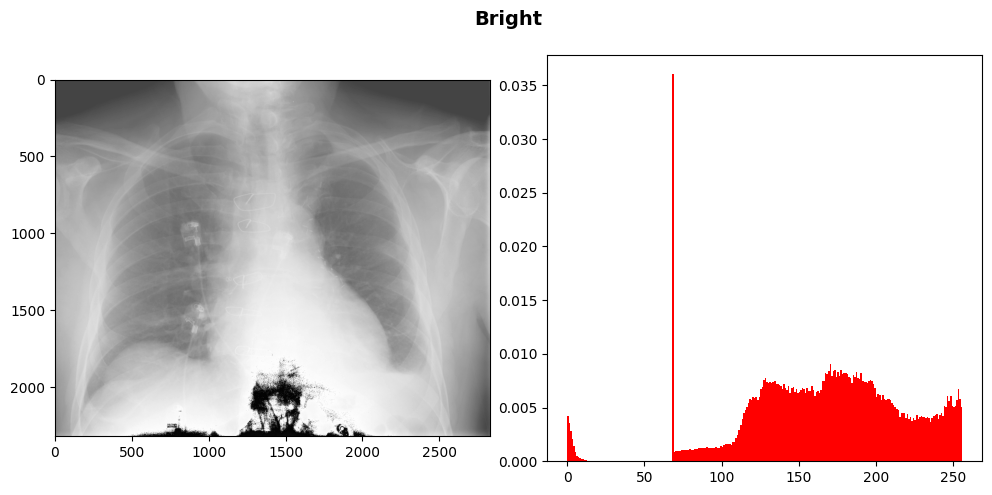

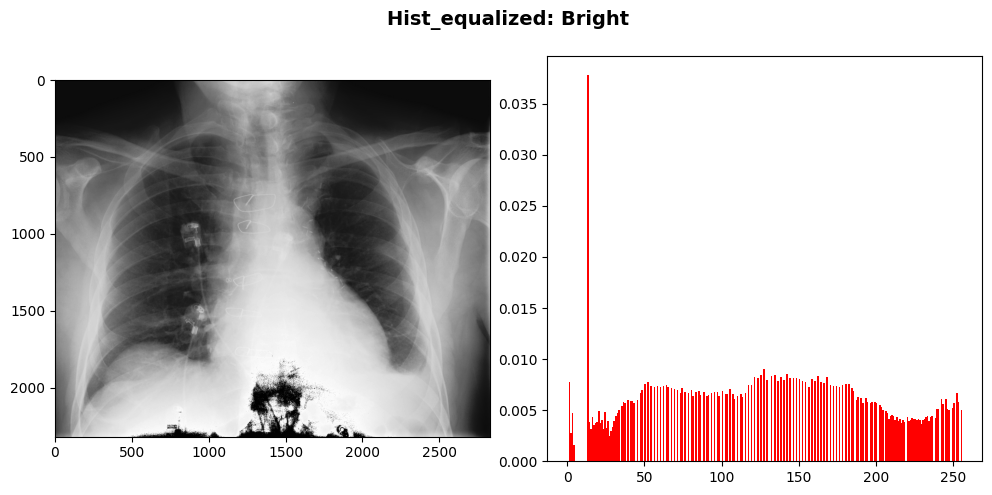

In [17]:
def show_results(img, title=None):

    # set up side-by-side image display
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
    fig.suptitle(title, fontsize=14, fontweight='bold')
    fig.tight_layout()
    
    # show the image
    ax1.imshow(img, cmap='gray')
    
    # show the histogram
    ax2.hist(img.ravel(),  bins=256, range=[0,256], color='r',density=True)
    plt.show()

imgs = [img_org, low_contrast_img, dark_img, bright_img]
names = ['Original', 'Low Contrast', 'Dark', 'Bright']

for img, name in zip(imgs, names):
    img = img.astype(np.uint8)
    show_results(img, title=name)
    
    show_results(hist_equalization(img), title = f'Hist_equalized: {name}')

## 3.2 

bit plane slicing

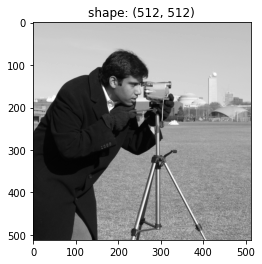

In [38]:
img = img_read(data.camera(), ret_gray=True)

In [46]:
def bit_plane_slice(img, hstack=False): 
    out = []

    for k in range(0, 8):
        # create an image for each k bit plane
        plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)
        # execute bitwise and operation
        res = cv2.bitwise_and(plane, img)
        # multiply ones (bit plane sliced) with 255 just for better visualization
        x = res * 255
        # append to the output list
        out.append(x)
    
    if hstack:
        # horizontal stack to visualize all bit planes
        out = np.hstack(out)
    return out

out = bit_plane_slice(img)

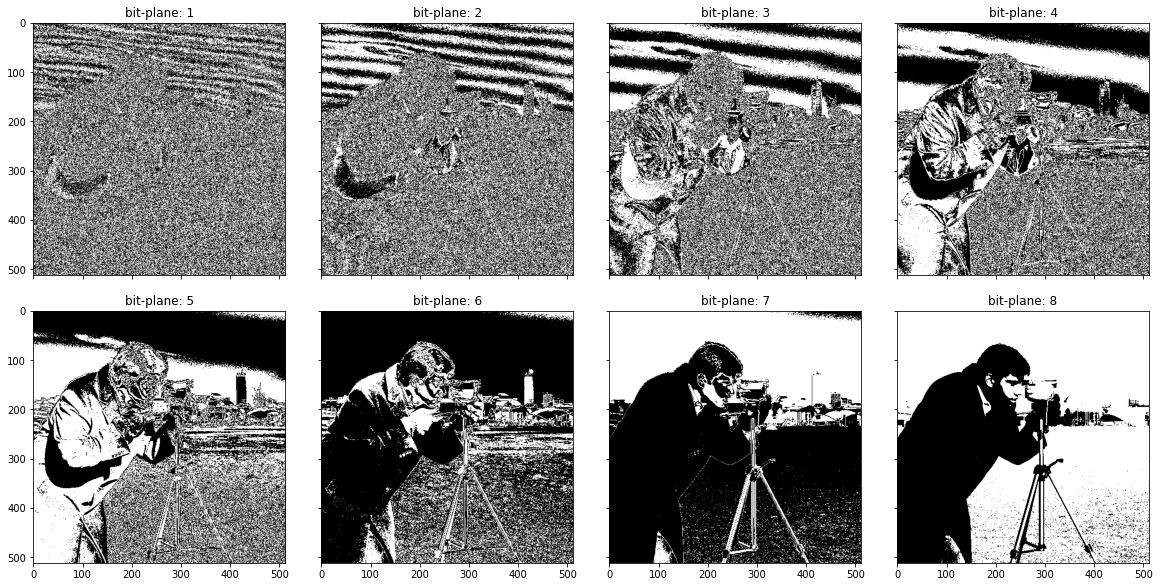

In [58]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(20, 20))
img_grid = ImageGrid(fig, 111, 
                     nrows_ncols=(2, 4), 
                     axes_pad=0.5,)

for im, ax, i in zip(out, img_grid, range(1, 9)):
    ax.imshow(im, cmap='gray')
    ax.set_title(f'bit-plane: {i}')


plt.show()